# Árboles de Decisión - Parte I

Es un algoritmo de decisión (d'oh!) que es usado tanto para la regresión como para la clasificación, ya que nos permite predecir en qué categoría van a caer los nuevos registros que se incorporen a la base de datos.

Es decir, a diferencia de los algoritmos de regresión, los cuales predicen únicamente valores numéricos (e.g. un precio, una ganancia, una probabilidad, etc.), los árboles de decisión pueden también predecir categorías (e.g. si un email es legítimo o spam).

![Arbol](./assets/arbol_decision.png)

Un árbol de decisión podría considerarse una gran ramificación donde cada pregunta o condición divide a los datos en nuevas ramas, basándose en sus características hasta llegar a una predicción o conclusión final de esas ramas (como en el juego "Adivina quién").

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
# Cargar datos de ejemplo
df: pd.DataFrame = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Iris** es una base de datos de Seaborn que contiene 150 registros de flores de iris.

![Foto de Zhao Yangjun (@youngjun420) en Unsplash](https://images.unsplash.com/photo-1684154740753-00e1f0b3a7f1?q=80&w=870&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

In [5]:
# Verificar las especies de flores de iris que hay
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Ahora, entrenemos un modelo para que cuando encontremos una nueva flor que queramos verificar a qué especie pertenece (es decir, implica anticipar una categoría). Para ello, se deben crear conjuntos de entrenamiento y de prueba antes de entrenar al modelo.

- **Variables independientes:** largos y anchos tanto de los sépalos como de los pétalos.
- **Variable dependiente:** la especie.

In [6]:
X: pd.DataFrame = df.drop('species', axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Nótese que, como la variable independiente es categorial, debemos primero codificar sus valores en términos numéricos con los cuales el algoritmo pueda hacer cálculos.

In [7]:
# Codificar categorías como números
encoder: LabelEncoder = LabelEncoder()
y = encoder.fit_transform(df['species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

In [9]:
# Crear el objeto del modelo
tree: DecisionTreeClassifier = DecisionTreeClassifier()

In [10]:
# Entrenar el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

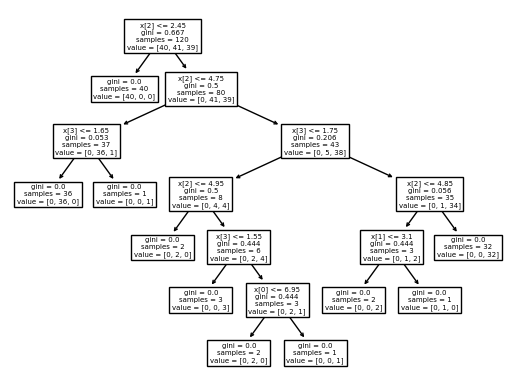

In [11]:
# Plotear el árbol
plot_tree(decision_tree=tree)

# Árboles de Decisión - Parte II

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

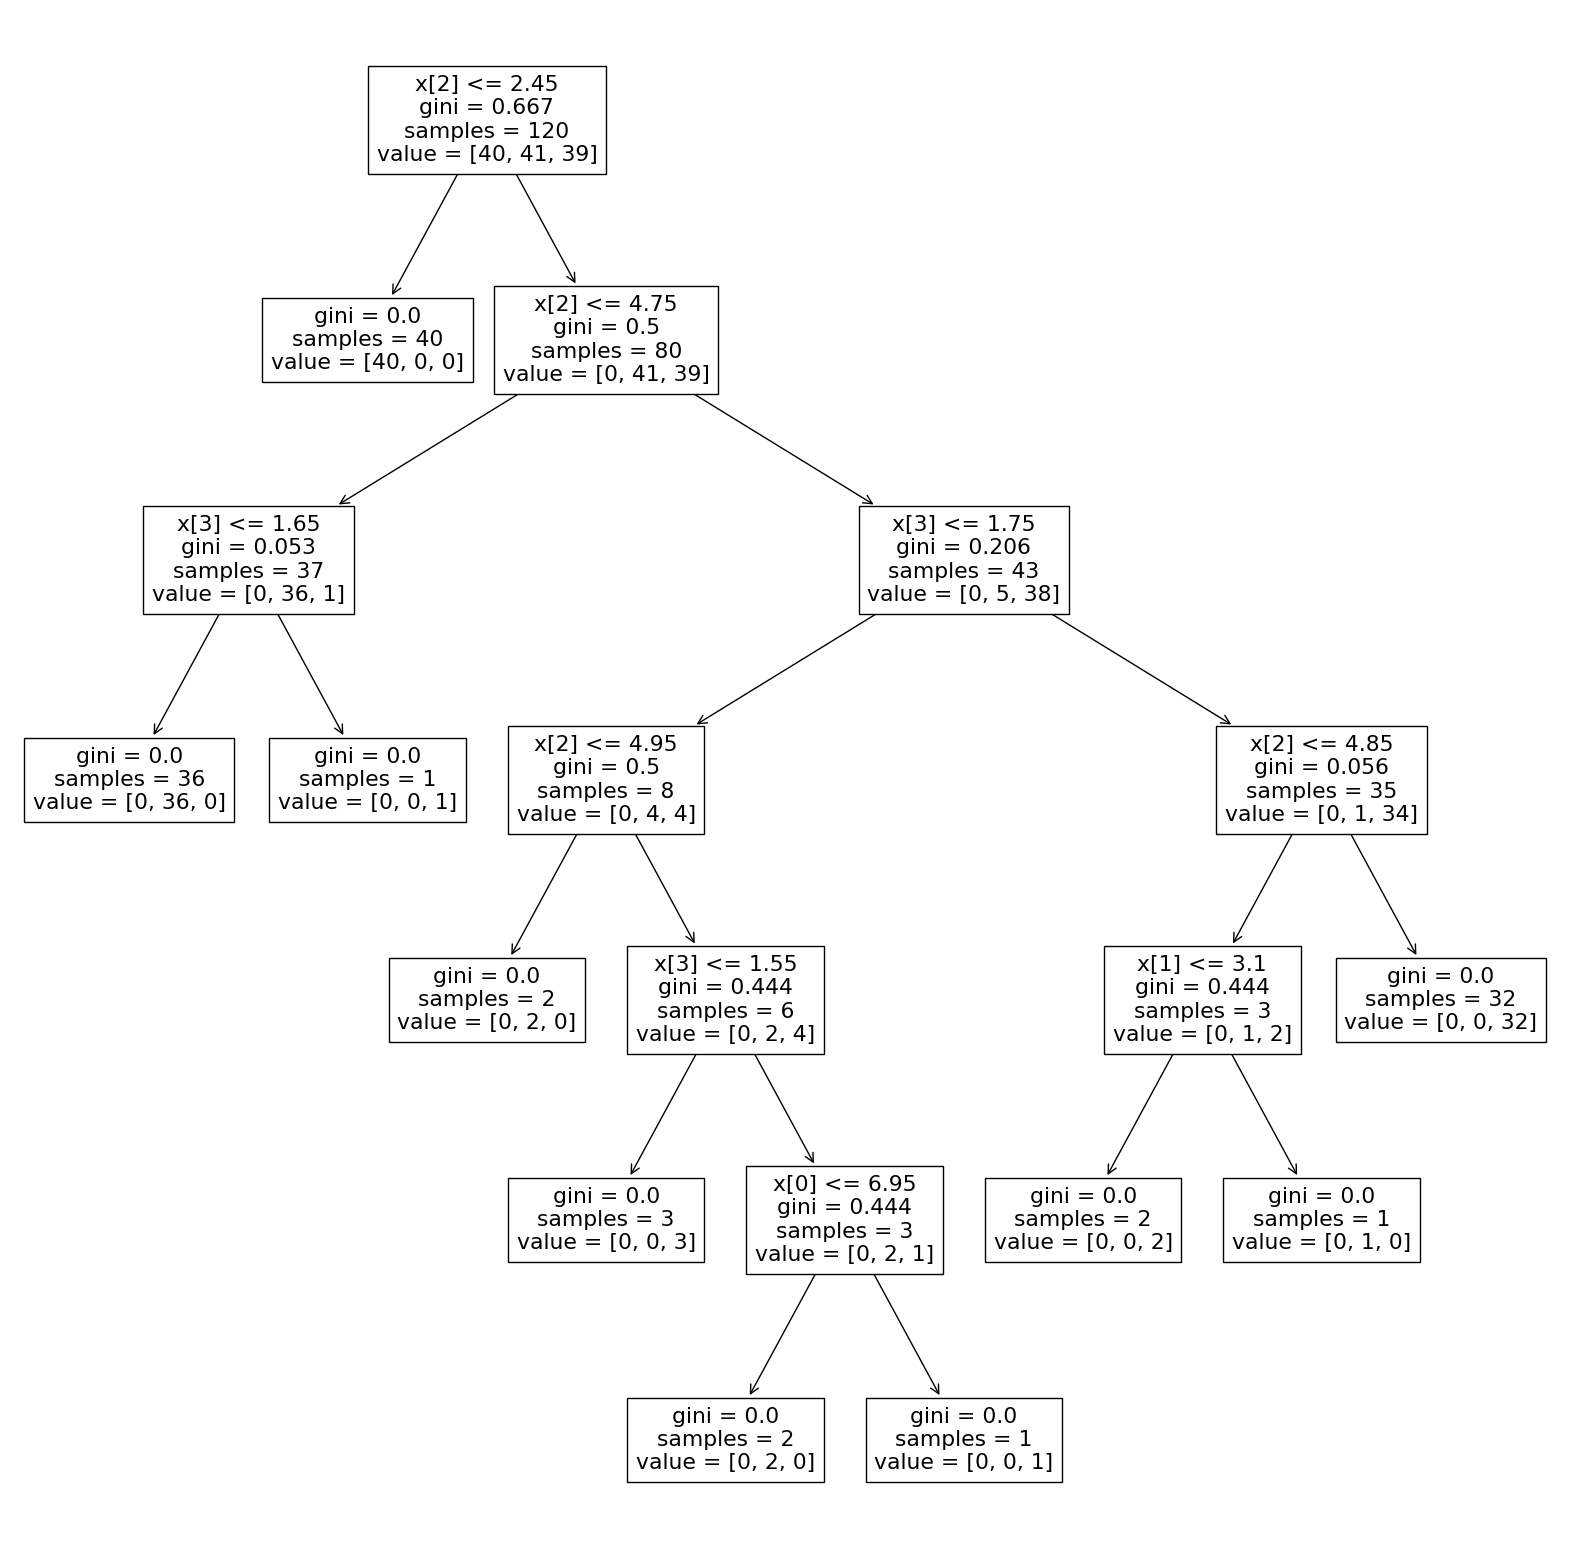

In [12]:
# Aumentar el tamaño del árbol ploteado
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=tree)

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

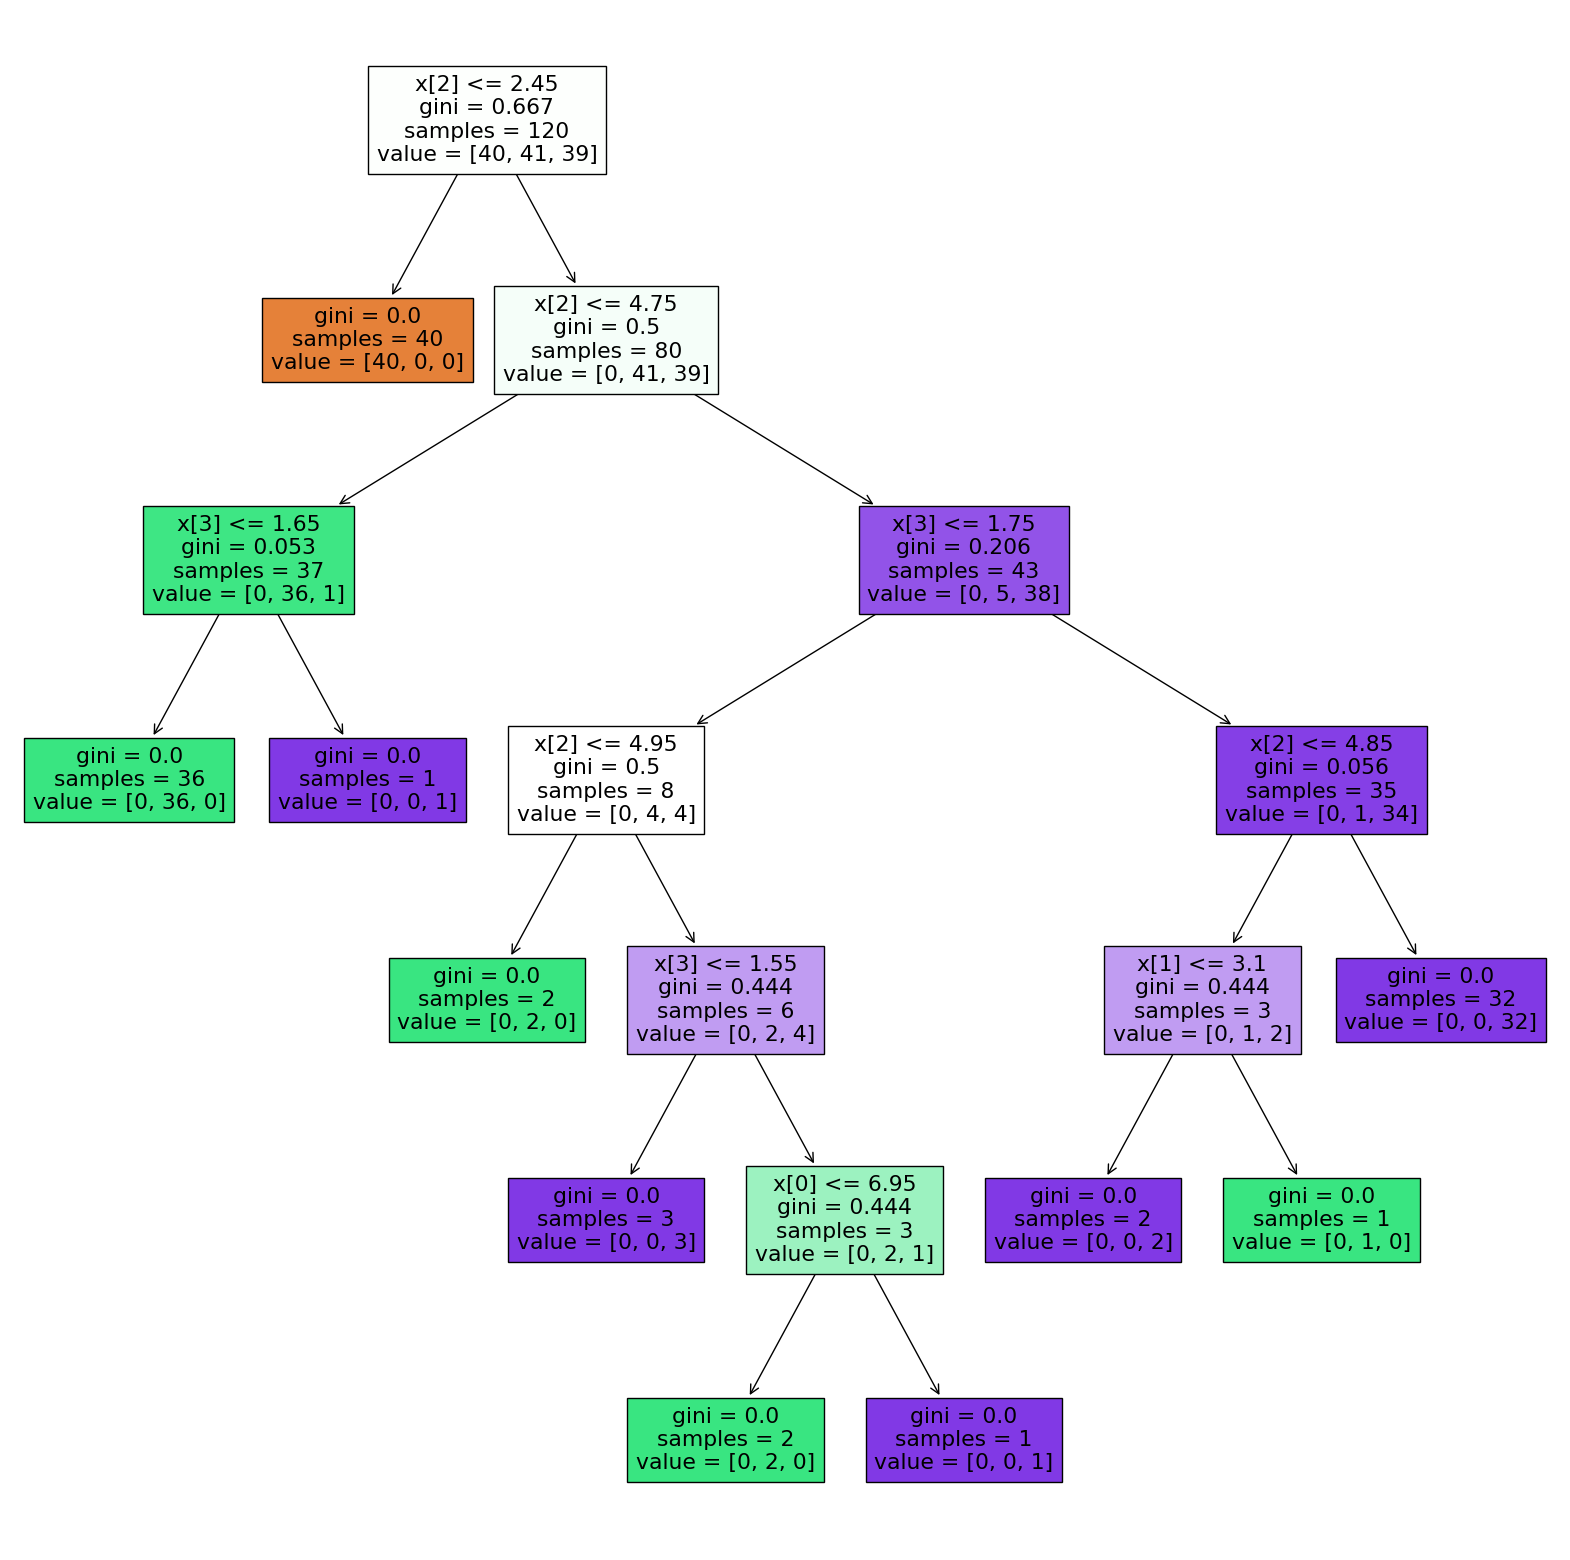

In [13]:
# Colorear el árbol para diferenciar las categorías (especies)
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=tree, filled=True)

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0.3076923076923077, 0.35714285714285715, 'g

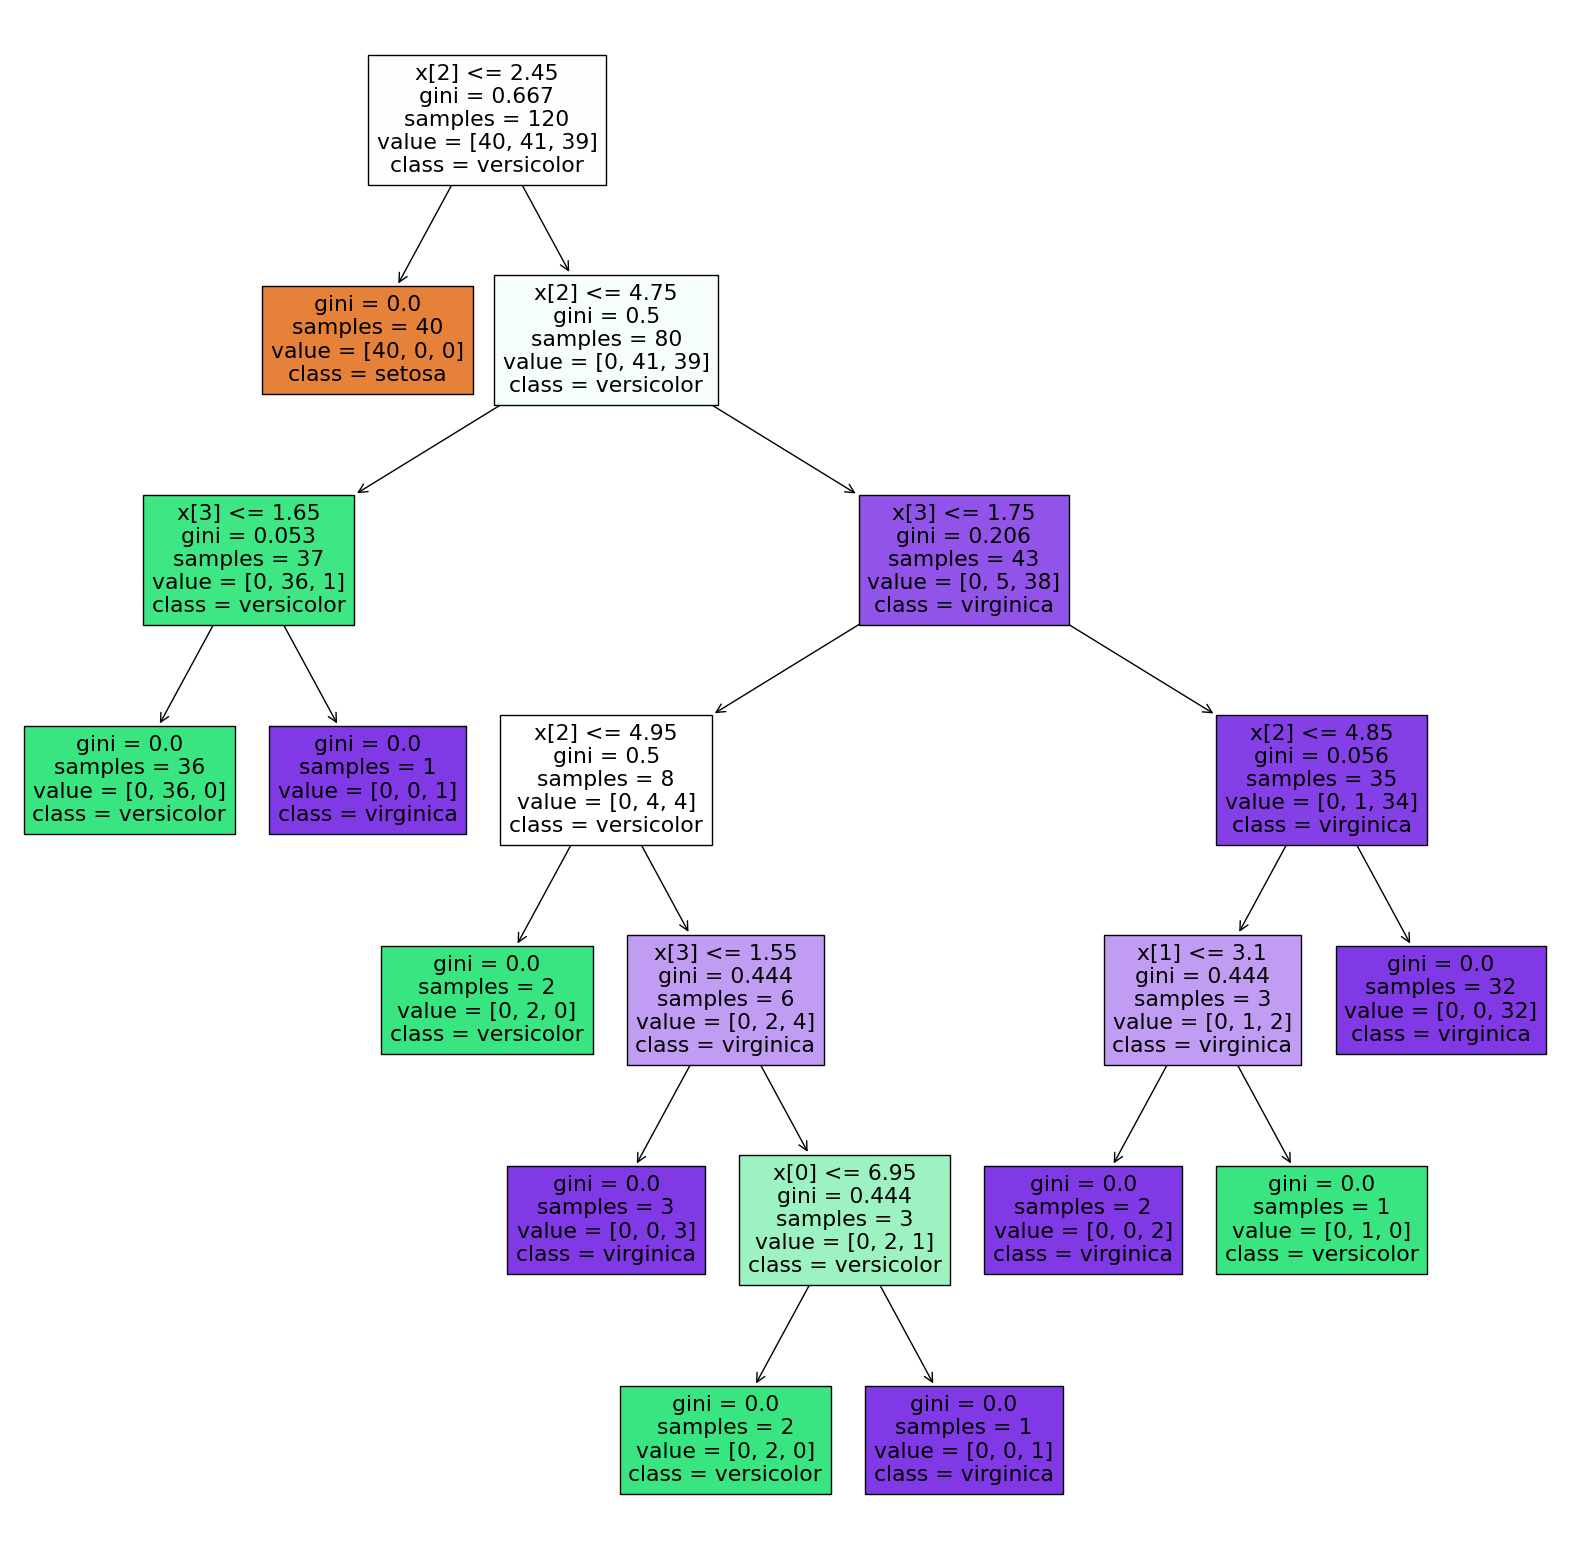

In [14]:
# Agregar nombre de las categorías (especies)
plt.figure(figsize=(20, 20))
plot_tree(
    decision_tree=tree,
    filled=True,
    class_names=list(df['species'].unique())
)

Nótese que los valores `x[2]` o `x[3]` en los recuadros son las columnas (según índice) del eje `X` que dan cuenta de la decisión que ha tomado el modelo en cada punto para dividir los datos. Sin embargo, esto no es muy legible. Es mejor tener los nombres de las columnas que se han utilizado.

[Text(0.3076923076923077, 0.9285714285714286, 'petal_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal_length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal_width <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal_width <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal_length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0.307

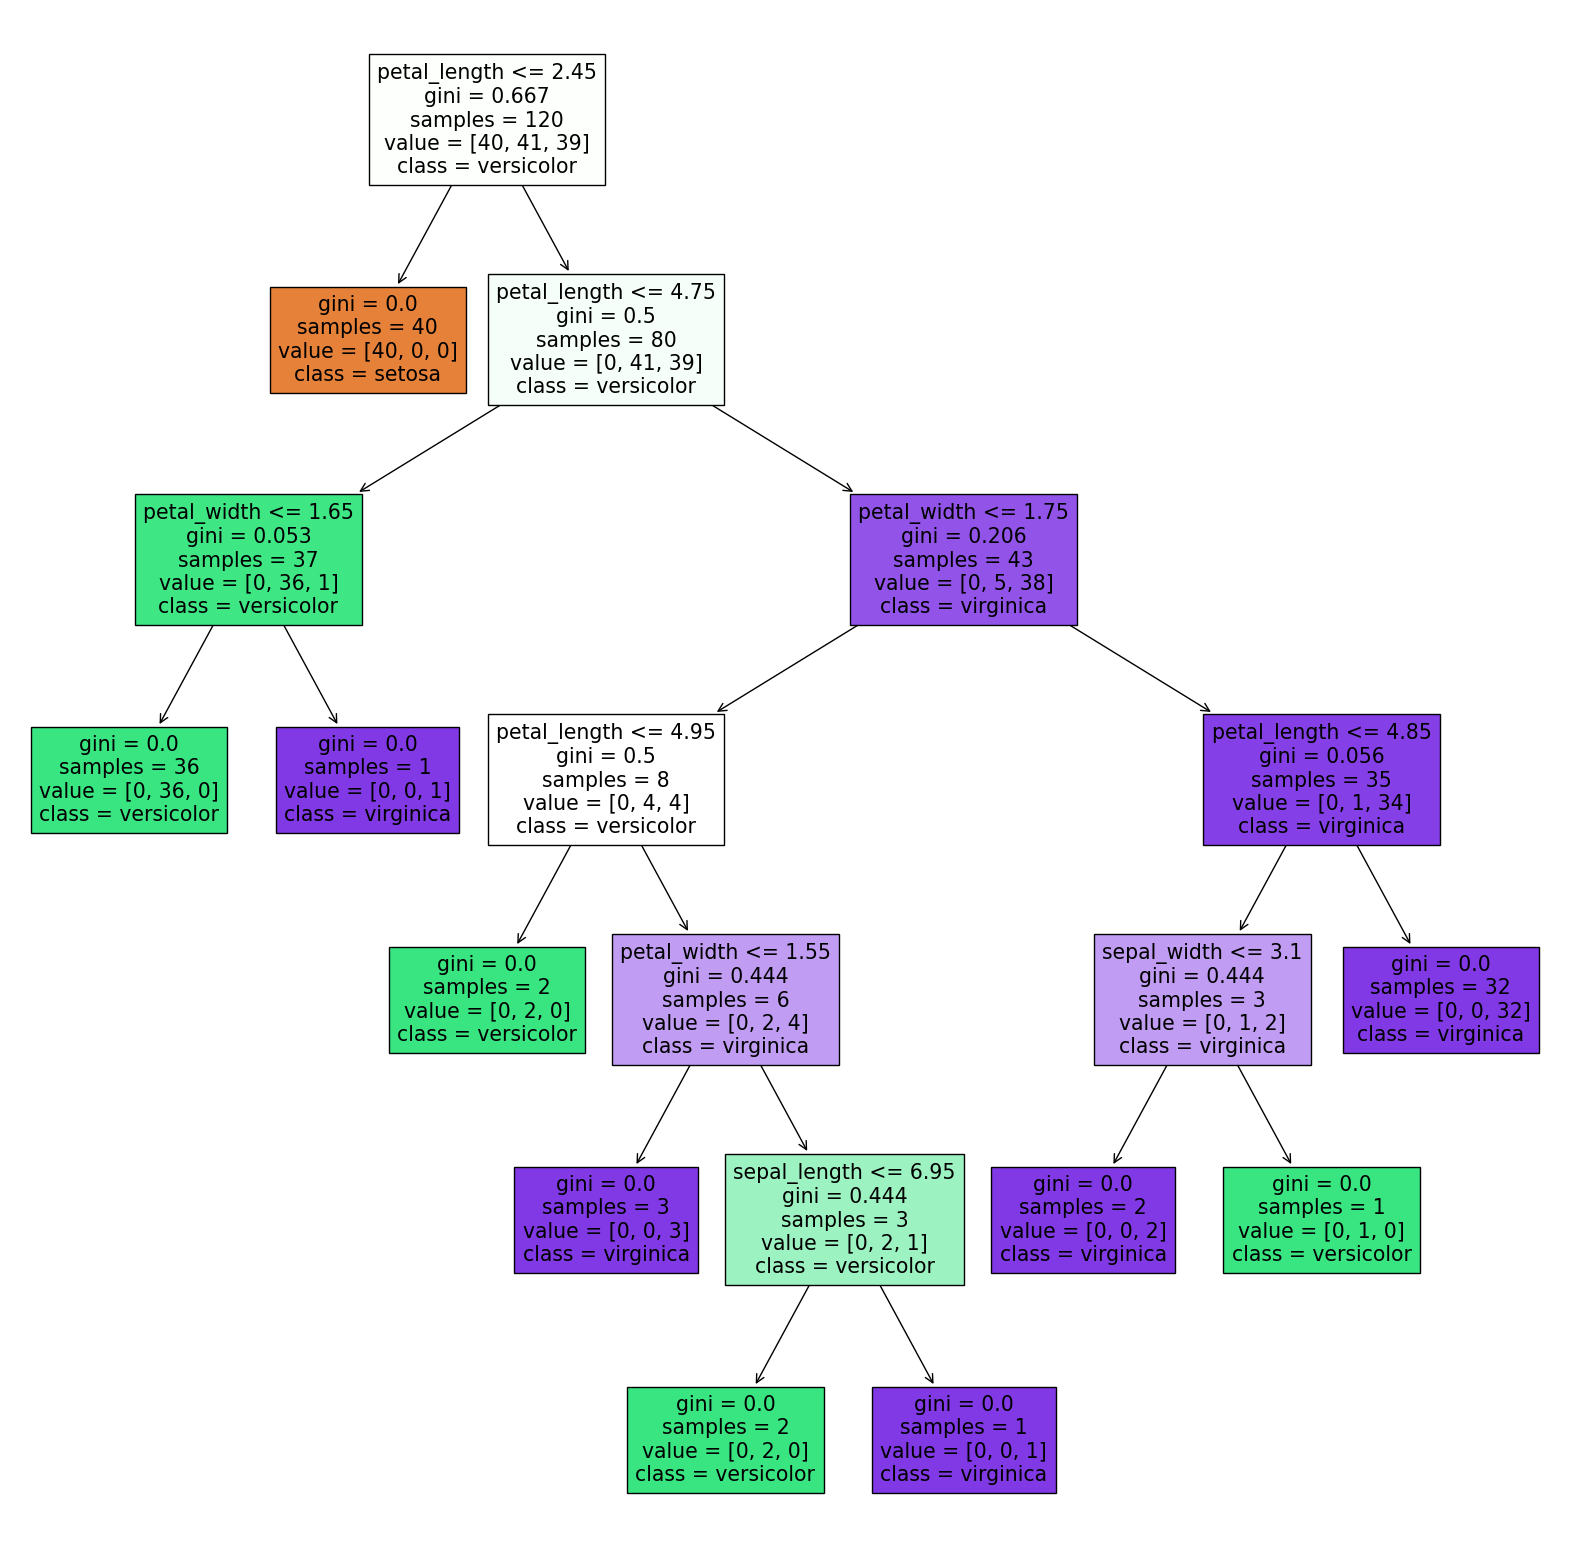

In [17]:
# Mejorar legibilidad con nombres de columnas
plt.figure(figsize=(20, 20))
plot_tree(
    decision_tree=tree,
    filled=True,
    class_names=list(df['species'].unique()),
    feature_names=df.columns.to_list()  # Según Federico
)
# No será mejor feature_names=list(df.drop('species', axis=1).columns) ?

## Interpretación del árbol

El modelo ha identificado, en el nodo raíz, que la mejor forma de comenzar a hacerse preguntas para clasificar a las nuevas flores que lleguen al modelo es preguntarnos si el largo de su pétalo `petal_length` es igual o menor a `2.45`, ya que si es así, es altamente probable de que se trate de una flor de la especie `setosa`, y la lleva al lado izquierdo del árbol. Por cierto, **todo lo que va hacia el lado izquierdo del árbol siempre es un `'sí'`** (en sentido booleano, tal como `True`, `1`, etc.).

El concepto **Gini** es el coeficiente que mide la "impureza" del nodo y por lo tanto nos dice **qué tan confiable es** dicho nodo. Si tuviera un valor de `0.0` (como se puede ver en el nodo naranja), indicaría que es un nodo perfectamente puro y que todas las muestras del nodo son de una sola clase o categoría.

En el primer nodo, tenemos un Gini relativamente bajo porque, tal y como lo indica `samples`, tenemos al comienzo 120 casos de diferentes clases. De hecho, podemos ver en `values` que hay `40` muestras que corresponden a `setosa`, `41` a `versicolor` y `39` a `virginica`. Si bien, son bastante parejos en cantidad, son todas de diferentes especies y, por lo tanto, no es un nodo puro. Dicho sea de paso, es la razón por la que está el **nodo pintado de blanco**, porque es **totalmente impuro**. Por último, `class` nos indica la categoría con mayor cantidad de muestras (en este nodo es `versicolor`).

Nótese que la relación entre el nodo raíz (impuro) y su nodo hijo de color naranja (puro). Lo que ha hecho nuestro árbol de decisión es identificar que, sin lugar a dudas, esta pregunta (`petal_length <= 2.45`) permite definir si una flor de iris es `setosa` o no lo es.

El proceso se repite al lado derecho (con las muestras que no son `setosa`) y continua hasta encontrar las preguntas que identifiquen a otras clases, y así llegar a las "hojas" del árbol de decisión para alcanzar un puntaje Gini de `0.0`.

Este nivel de perfección, por supuesto, se debe a que hemos usado una base de datos ficticia muy controlada y, en la vida real, es muy difícil encontrar estos niveles de precisión, sino que vamos a tener que ir definiendo cuáles son los umbrales de confianza que vamos a ir estableciendo para nuestros modelos, según sea el caso (0.80, 0.85, 0.90, y así).